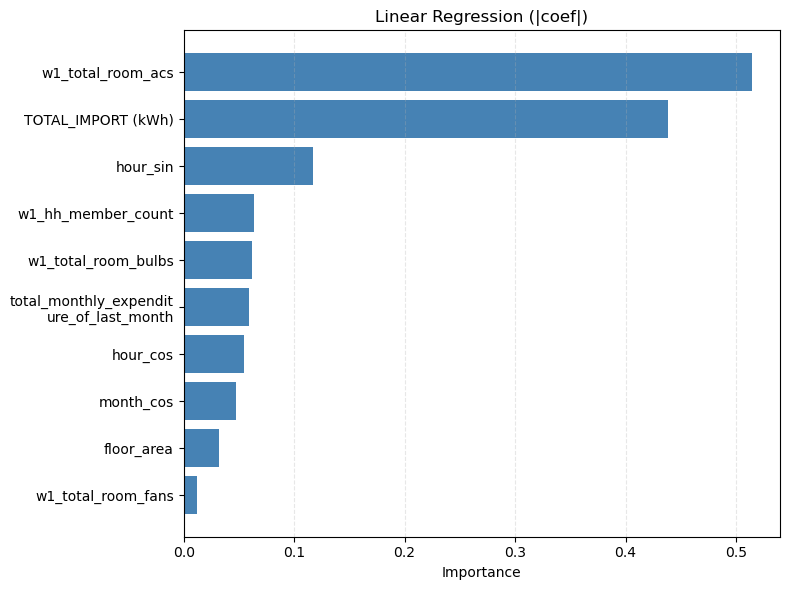

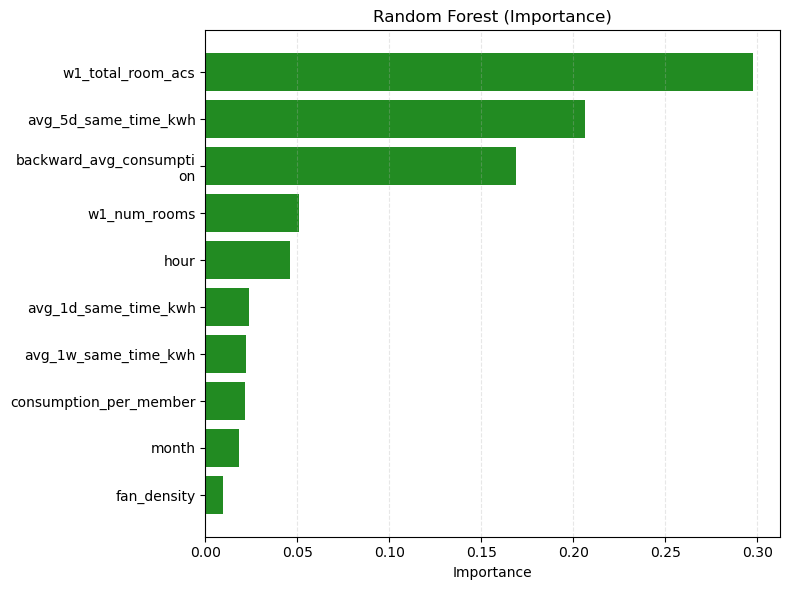

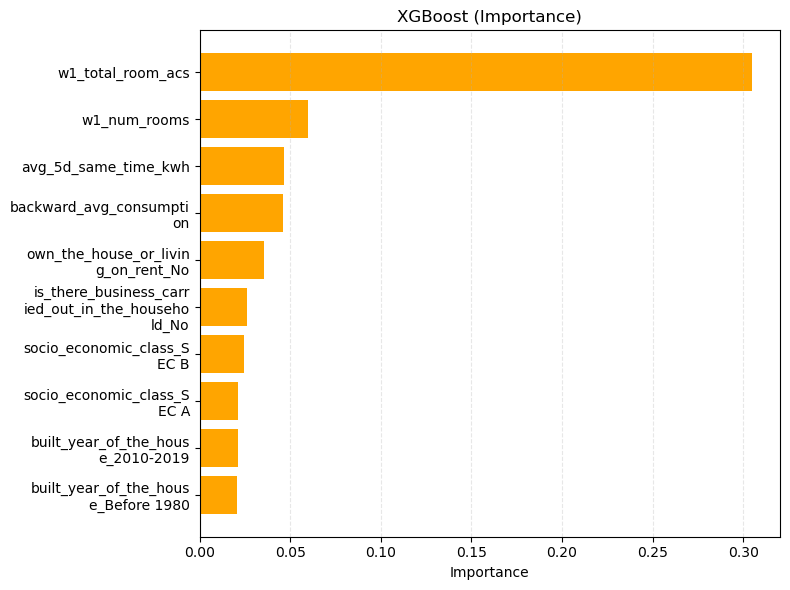

Saved: feature_importance_linear.png, feature_importance_rf.png, feature_importance_xgb.png


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import textwrap

# ========= 1. Load Datasets =========
df_lin = pd.read_csv("best_model_coefficients_elastic.csv")
df_rf  = pd.read_csv("feature_importances_rf.csv")
df_xgb = pd.read_csv("feature_importances_xg.csv")

K = 10

def wrap_name(name, width=22):
    name = str(name)
    if "," in name:
        name = name.split(",")[0]
    return textwrap.fill(name, width)

# ========= 2. Linear Regression =========
df_lin["abs_coef"] = df_lin["Abs_Coefficient"]
top_lin = df_lin.sort_values(by="abs_coef", ascending=True).tail(K)
lin_labels = [wrap_name(n) for n in top_lin["Feature"]]
lin_values = top_lin["abs_coef"]

# ========= 3. Random Forest =========
top_rf = df_rf.sort_values(by="importance", ascending=True).tail(K)
rf_labels = [wrap_name(n) for n in top_rf["feature"]]
rf_values = top_rf["importance"]

# ========= 4. XGBoost =========
top_xgb = df_xgb.sort_values(by="importance", ascending=True).tail(K)
xgb_labels = [wrap_name(n) for n in top_xgb["feature"]]
xgb_values = top_xgb["importance"]

# ========= 5. Plot =========

# ----- Linear Regression -----
plt.figure(figsize=(8, 6))
plt.barh(lin_labels, lin_values, color="steelblue")
plt.title("Linear Regression (|coef|)")
plt.xlabel("Importance")
plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.savefig("feature_importance_linear.png", dpi=300, bbox_inches="tight")
plt.show()

# ----- Random Forest -----
plt.figure(figsize=(8, 6))
plt.barh(rf_labels, rf_values, color="forestgreen")
plt.title("Random Forest (Importance)")
plt.xlabel("Importance")
plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.savefig("feature_importance_rf.png", dpi=300, bbox_inches="tight")
plt.show()

# ----- XGBoost -----
plt.figure(figsize=(8, 6))
plt.barh(xgb_labels, xgb_values, color="orange")
plt.title("XGBoost (Importance)")
plt.xlabel("Importance")
plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.savefig("feature_importance_xgb.png", dpi=300, bbox_inches="tight")
plt.show()

print("Saved: feature_importance_linear.png, feature_importance_rf.png, feature_importance_xgb.png")